#### This code demonstrates the implementation of Logistic Regression using Neural Network approach

###### The 5-Step Model Life-Cycle


A model has a life-cycle, and this very simple knowledge provides the backbone for both modeling a dataset and understanding the tf.keras API.

The five steps in the life-cycle are as follows:

1. Define the model.
2. Compile the model.
3. Fit the model.
4. Evaluate the model.
5. Make predictions.

##### Reference :https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/

In [16]:
#importing the relevant libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset 
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       351 non-null    int64  
 1   1       351 non-null    int64  
 2   2       351 non-null    float64
 3   3       351 non-null    float64
 4   4       351 non-null    float64
 5   5       351 non-null    float64
 6   6       351 non-null    float64
 7   7       351 non-null    float64
 8   8       351 non-null    float64
 9   9       351 non-null    float64
 10  10      351 non-null    float64
 11  11      351 non-null    float64
 12  12      351 non-null    float64
 13  13      351 non-null    float64
 14  14      351 non-null    float64
 15  15      351 non-null    float64
 16  16      351 non-null    float64
 17  17      351 non-null    float64
 18  18      351 non-null    float64
 19  19      351 non-null    float64
 20  20      351 non-null    float64
 21  21      351 non-null    float64
 22  22

In [4]:
data[34].value_counts() #this shows that the output variable has only 2 values

g    225
b    126
Name: 34, dtype: int64

In [5]:
#declaring the input and output columns
X = data.values[:,:-1]
y = data.values[:,-1]

In [6]:
#converting all the datatype of the column in X as float
X = X.astype(float)

In [7]:
#converting the string values from the y into integers
y = LabelEncoder().fit_transform(y)

In [8]:
#splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print("****** Dimensions of train and test dataset ******\n X-train : {}\n X-test : {}\n y-train : {}\n y-test : {}".format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

****** Dimensions of train and test dataset ******
 X-train : (235, 34)
 X-test : (116, 34)
 y-train : (235,)
 y-test : (116,)


In [9]:
#determinig the number of input features
inputFeatures = X_train.shape[1]

In [10]:
#defining a model
model = Sequential()

#input layer and first hidden layer
model.add(Dense(X_train.shape[1],activation='relu',kernel_initializer='he_normal',input_shape=(inputFeatures,)))

#second hidden layer
model.add(Dense(8,kernel_initializer='he_normal',activation='relu'))

#output layer
model.add(Dense(1,activation='sigmoid'))


In [11]:
#summary of the model 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 34)                1190      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 280       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 1,479
Trainable params: 1,479
Non-trainable params: 0
_________________________________________________________________


In [12]:
#compiling the model 
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
#fitting the model 
model.fit(X_train,y_train,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
235/235 [==============================] - 0s 1ms/sample - loss: 0.7098 - accuracy: 0.6170
Epoch 2/100
235/235 [==============================] - 0s 87us/sample - loss: 0.6752 - accuracy: 0.6383
Epoch 3/100
235/235 [==============================] - 0s 138us/sample - loss: 0.6448 - accuracy: 0.6723
Epoch 4/100
235/235 [==============================] - 0s 108us/sample - loss: 0.6202 - accuracy: 0.6851
Epoch 5/100
235/235 [==============================] - 0s 91us/sample - loss: 0.6012 - accuracy: 0.6936
Epoch 6/100
235/235 [==============================] - 0s 111us/sample - loss: 0.5845 - accuracy: 0.7021
Epoch 7/100
235/235 [==============================] - 0s 99us/sample - loss: 0.5689 - accuracy: 0.7021
Epoch 8/100
235/235 [==============================] - 0s 89us/sample - loss: 0.5550 - accuracy: 0.7191
Epoch 9/100
235/235 [==============================] - 0s 108us/sample - loss: 0.5423 - accuracy: 0.7191
Epoch 10/100
235/235 [==============================] - 0s 94

235/235 [==============================] - 0s 52us/sample - loss: 0.0753 - accuracy: 0.9872
Epoch 79/100
235/235 [==============================] - 0s 74us/sample - loss: 0.0740 - accuracy: 0.9872
Epoch 80/100
235/235 [==============================] - 0s 81us/sample - loss: 0.0728 - accuracy: 0.9872
Epoch 81/100
235/235 [==============================] - 0s 64us/sample - loss: 0.0726 - accuracy: 0.9872
Epoch 82/100
235/235 [==============================] - 0s 72us/sample - loss: 0.0705 - accuracy: 0.9872
Epoch 83/100
235/235 [==============================] - 0s 61us/sample - loss: 0.0690 - accuracy: 0.9872
Epoch 84/100
235/235 [==============================] - 0s 58us/sample - loss: 0.0682 - accuracy: 0.9872
Epoch 85/100
235/235 [==============================] - 0s 65us/sample - loss: 0.0666 - accuracy: 0.9872
Epoch 86/100
235/235 [==============================] - 0s 71us/sample - loss: 0.0656 - accuracy: 0.9872
Epoch 87/100
235/235 [==============================] - 0s 64us/samp

In [14]:
#evaluating the model
loss,acc = model.evaluate(X_test,y_test,verbose=0)
print("Test Accuracy : ",round(acc,3))

Test Accuracy :  0.922


In [15]:
#making a prediction . Converting the input variables into a single dimension using reshape(1,-1) method of numpy
row = np.array([1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]).reshape(1,-1)
prediction = model.predict(row)
print("Prediction for the input values :",prediction)

Prediction for the input values : [[0.98464394]]


In [28]:
Model = model.fit(X_train,y_train,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
235/235 [==============================] - 0s 59us/sample - loss: 0.0162 - accuracy: 0.9957
Epoch 2/100
235/235 [==============================] - 0s 150us/sample - loss: 0.0162 - accuracy: 0.9957
Epoch 3/100
235/235 [==============================] - 0s 87us/sample - loss: 0.0165 - accuracy: 0.9957
Epoch 4/100
235/235 [==============================] - 0s 87us/sample - loss: 0.0161 - accuracy: 0.9957
Epoch 5/100
235/235 [==============================] - 0s 97us/sample - loss: 0.0160 - accuracy: 0.9957
Epoch 6/100
235/235 [==============================] - 0s 70us/sample - loss: 0.0156 - accuracy: 0.9957
Epoch 7/100
235/235 [==============================] - 0s 80us/sample - loss: 0.0155 - accuracy: 0.9957
Epoch 8/100
235/235 [==============================] - 0s 88us/sample - loss: 0.0154 - accuracy: 0.9957
Epoch 9/100
235/235 [==============================] - 0s 90us/sample - loss: 0.0153 - accuracy: 0.9957
Epoch 10/100
235/235 [==============================] - 0s 80us

235/235 [==============================] - 0s 76us/sample - loss: 0.0070 - accuracy: 1.0000
Epoch 79/100
235/235 [==============================] - 0s 80us/sample - loss: 0.0072 - accuracy: 1.0000
Epoch 80/100
235/235 [==============================] - 0s 82us/sample - loss: 0.0071 - accuracy: 1.0000
Epoch 81/100
235/235 [==============================] - 0s 87us/sample - loss: 0.0070 - accuracy: 1.0000
Epoch 82/100
235/235 [==============================] - 0s 58us/sample - loss: 0.0067 - accuracy: 1.0000
Epoch 83/100
235/235 [==============================] - 0s 87us/sample - loss: 0.0068 - accuracy: 1.0000
Epoch 84/100
235/235 [==============================] - 0s 76us/sample - loss: 0.0067 - accuracy: 1.0000
Epoch 85/100
235/235 [==============================] - 0s 73us/sample - loss: 0.0068 - accuracy: 1.0000
Epoch 86/100
235/235 [==============================] - 0s 80us/sample - loss: 0.0065 - accuracy: 1.0000
Epoch 87/100
235/235 [==============================] - 0s 74us/samp

In [38]:
#MOdel Parameters
Model.params

{'batch_size': 32,
 'epochs': 100,
 'steps': None,
 'samples': 235,
 'verbose': 1,
 'do_validation': False,
 'metrics': ['loss', 'accuracy']}

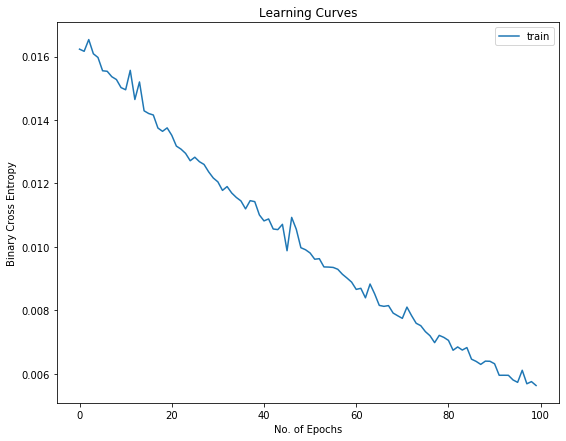

In [40]:
#Visualizing the learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(9,7))
plt.plot(Model.history['loss'],label='train')
plt.xlabel('No. of Epochs')
plt.ylabel('Binary Cross Entropy')
plt.title('Learning Curves')
plt.legend()
plt.show()